### Fraud Check

Use Random Forest to prepare a model on fraud data<br>
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

<b>Data Description</b> : <br>
Undergrad : person is under graduated or not Marital.<br>
Status : marital status of a person<br>
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government<br>
Work Experience : Work experience of an individual person<br>
Urban : Whether that person belongs to urban area or not<br>


In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



sns.set_style('darkgrid')

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [152]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [4]:
fraud_check = pd.read_csv("fraud_Check.csv")
fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
categorical_features = fraud_check.describe(include=["object"]).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [7]:
numerical_features = fraud_check.describe(include=["int64"]).columns
numerical_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')


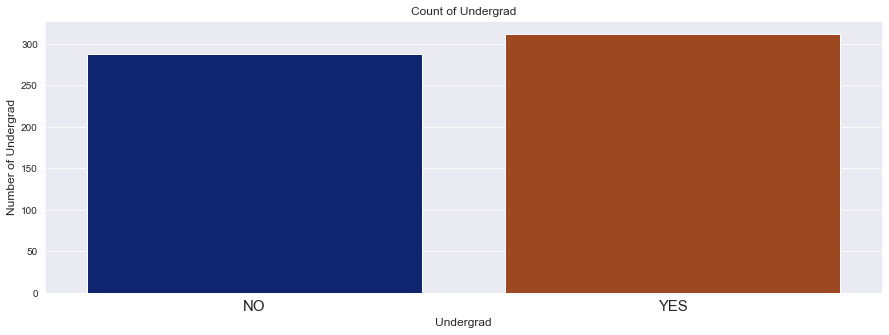

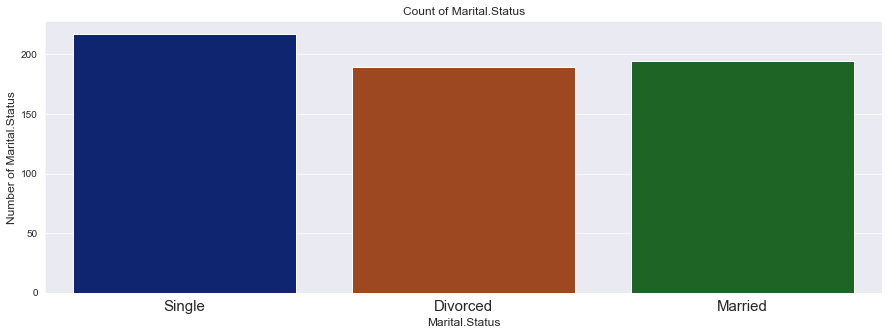

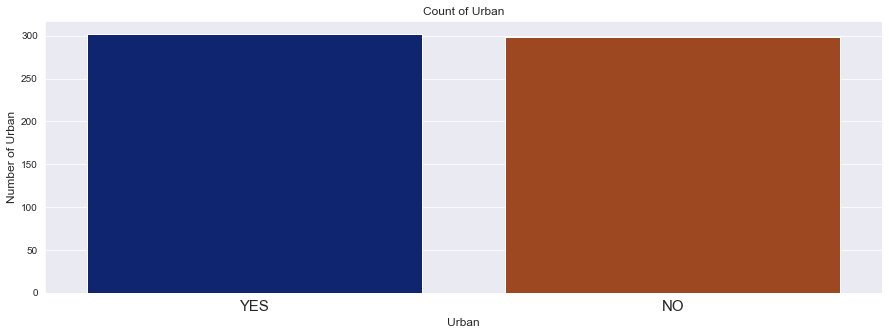

In [10]:
print(categorical_features)



for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(15, 5))
    df = fraud_check.copy()
    unique = df[column].value_counts(ascending=True);
 
    #plt.subplot(1, len(categorical_features), idx+1)    
    plt.title("Count of "+ column)
    sns.countplot(data=fraud_check, x=column,palette = "dark")
    #plt.bar(unique.index, unique.values);
    plt.xticks(rotation = 0, size = 15)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)

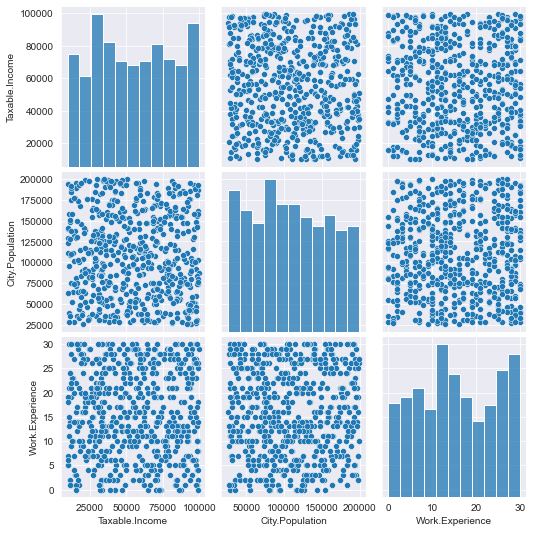

In [12]:
sns.set_style('darkgrid')
sns.pairplot(fraud_check[numerical_features])
plt.show()

In [27]:
def boxplot(x_param, y_param):
    plt.figure(figsize=(10,6))
    sns.boxplot(x=x_param, data=fraud_check,y=y_param, palette = "dark")
    plt.xlabel('\n'+ x_param)
    plt.ylabel(y_param + '\n')
    plt.title("parameter " + x_param + " vs " + y_param + " relation")
    plt.show()

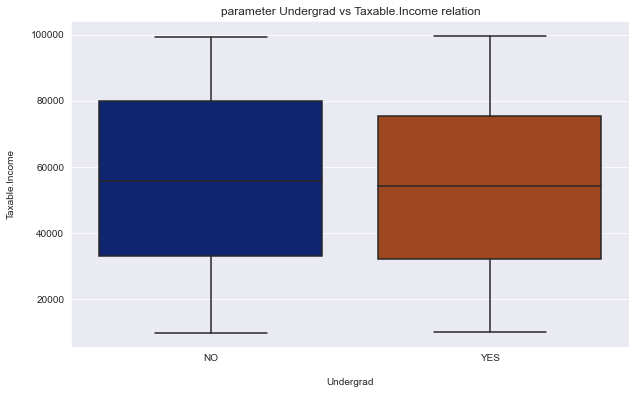

In [28]:
boxplot('Undergrad','Taxable.Income')

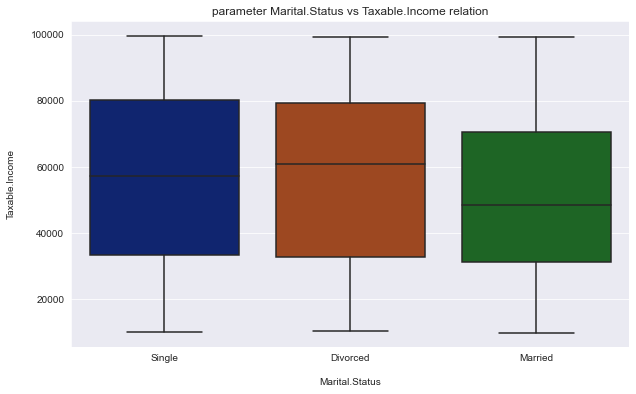

In [29]:
boxplot('Marital.Status', 'Taxable.Income')

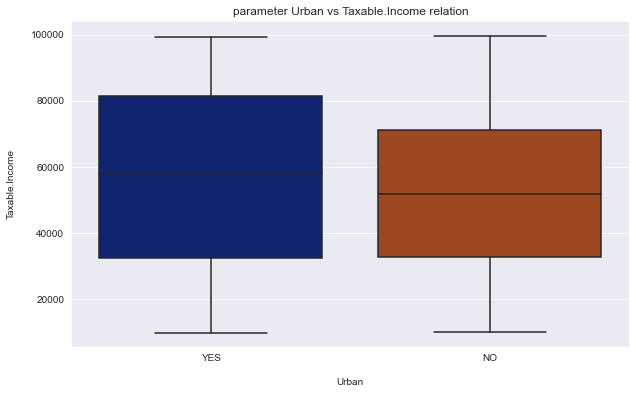

In [30]:
boxplot('Urban','Taxable.Income')

In [31]:
def factorplot(param):
    sns.factorplot(x =param, size = 7, aspect = 2, data = fraud_check, y= "Taxable.Income", palette = "dark")
    plt.xlabel("\n" + param)
    plt.ylabel("Sales\n")
    plt.show()

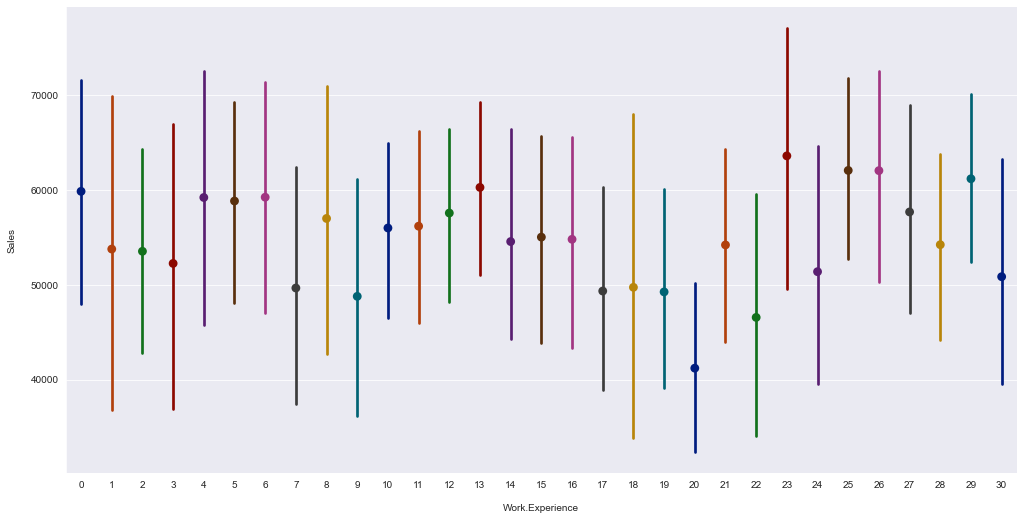

In [32]:
factorplot("Work.Experience")

In [34]:
fraud_check["Taxable.Income"].min()

10003

In [35]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
fraud_check['taxable_category'] = pd.cut(x = fraud_check['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
fraud_check.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [ ]:
type_ = ['Good', 'Risky']
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=fraud_check['taxable_category'].value_counts(), name="taxable_category"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Taxable category",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='taxable category', x=0.5, y=0.5, font_size=14, showarrow=False)])
fig.show()

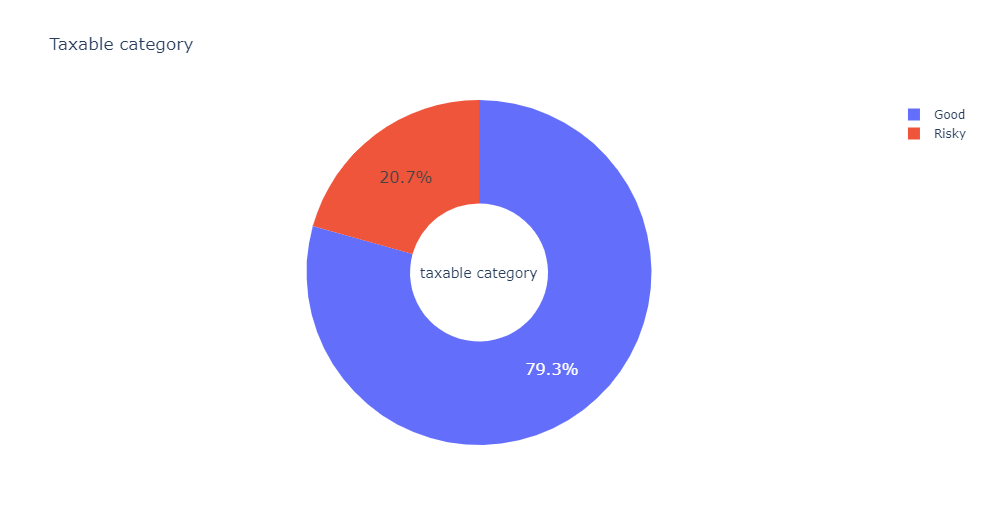

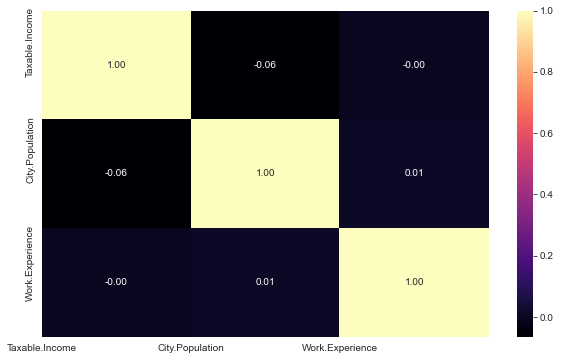

In [26]:

corr = fraud_check.corr()

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns);

plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

In [42]:
fraud_check["taxable_category"][fraud_check["taxable_category"] == 'Risky'].groupby(by = fraud_check.Undergrad).count()

Undergrad
NO     58
YES    66
Name: taxable_category, dtype: int64

In [43]:
fraud_check["taxable_category"][fraud_check["taxable_category"] == 'Good'].groupby(by = fraud_check.Undergrad).count()

Undergrad
NO     230
YES    246
Name: taxable_category, dtype: int64

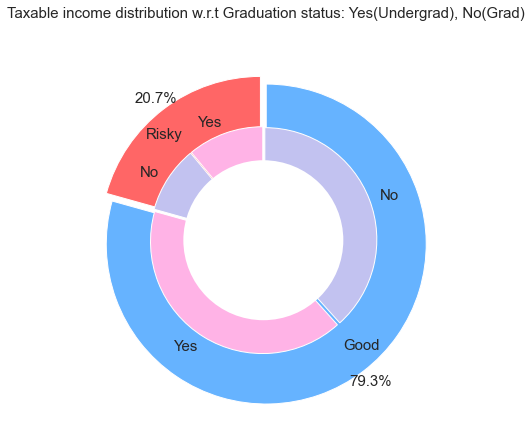

In [46]:
plt.figure(figsize=(6, 6))
labels =["Risky", "Good"]
values = [fraud_check["taxable_category"][fraud_check["taxable_category"] == 'Risky'].groupby(by = fraud_check.Undergrad).count().sum(),
         fraud_check["taxable_category"][fraud_check["taxable_category"] == 'Good'].groupby(by = fraud_check.Undergrad).count().sum()]
labels_gender = ["Yes","No","Yes","No"]
sizes_gender = [66,58 , 246,230]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#ffb3e6','#c2c2f0','#ffb3e6', '#c2c2f0']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Taxable income distribution w.r.t Graduation status: Yes(Undergrad), No(Grad)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [54]:
fraud_check["taxable_category"][fraud_check["taxable_category"] == 'Risky'].groupby(by = fraud_check.Urban).count()

Urban
NO     61
YES    63
Name: taxable_category, dtype: int64

In [55]:
fraud_check["taxable_category"][fraud_check["taxable_category"] == 'Good'].groupby(by = fraud_check.Urban).count()

Urban
NO     237
YES    239
Name: taxable_category, dtype: int64

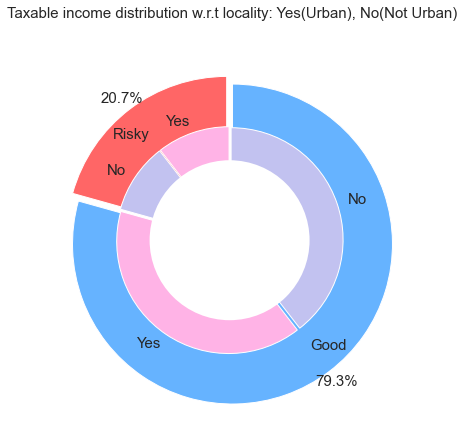

In [56]:
plt.figure(figsize=(6, 6))
labels =["Risky", "Good"]
values = [fraud_check["taxable_category"][fraud_check["taxable_category"] == 'Risky'].groupby(by = fraud_check.Urban).count().sum(),
         fraud_check["taxable_category"][fraud_check["taxable_category"] == 'Good'].groupby(by = fraud_check.Urban).count().sum()]
labels_gender = ["Yes","No","Yes","No"]
sizes_gender = [63,61 , 239,237]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#ffb3e6','#c2c2f0','#ffb3e6', '#c2c2f0']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Taxable income distribution w.r.t locality: Yes(Urban), No(Not Urban)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [48]:
fraud_check["taxable_category"][fraud_check["taxable_category"] == 'Risky'].groupby(by = fraud_check["Marital.Status"]).count()

Marital.Status
Divorced    36
Married     45
Single      43
Name: taxable_category, dtype: int64

In [49]:
fraud_check["taxable_category"][fraud_check["taxable_category"] == 'Good'].groupby(by = fraud_check["Marital.Status"]).count()

Marital.Status
Divorced    153
Married     149
Single      174
Name: taxable_category, dtype: int64

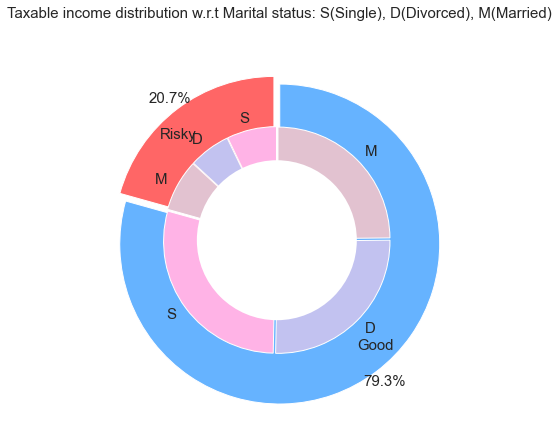

In [53]:
plt.figure(figsize=(6, 6))
labels =["Risky", "Good"]
values = [fraud_check["taxable_category"][fraud_check["taxable_category"] == 'Risky'].groupby(by = fraud_check["Marital.Status"]).count().sum(),
         fraud_check["taxable_category"][fraud_check["taxable_category"] == 'Good'].groupby(by = fraud_check["Marital.Status"]).count().sum()]
labels_gender = ["S","D","M","S","D", "M"]
sizes_gender = [43,36,45,174,153,149]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#ffb3e6','#c2c2f0','#e2c2d0','#ffb3e6', '#c2c2f0', '#e2c2d0']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Taxable income distribution w.r.t Marital status: S(Single), D(Divorced), M(Married)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

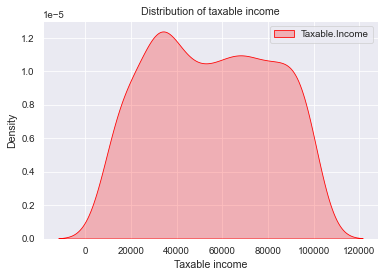

In [65]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(fraud_check["Taxable.Income"],
                color="Red", shade = True);
ax.legend(["Taxable.Income"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Taxable income');
ax.set_title('Distribution of taxable income');

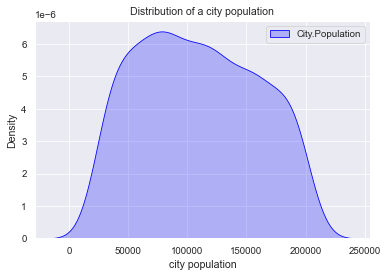

In [68]:
sns.set_context("paper",font_scale=1.1)

ax = sns.kdeplot(fraud_check["City.Population"],
                 color="Blue", shade= True);
ax.legend(["City.Population"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('city population');
ax.set_title('Distribution of a city population');

In [107]:
"""# Label encoding

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
data_copy= fraud_check.copy()
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in data_copy.columns[0:]:
    if len(list(data_copy[col].unique())) <= 3:
        le.fit(data_copy[col])
        data_copy[col] = le.transform(data_copy[col])
        le_count += 1
print('{} columns were label encoded.'.format(le_count))"""


# Converting categorical variables into dummy variables
data_= fraud_check.copy()
data_copy = pd.get_dummies(data_.iloc[:,:-1])


In [111]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
data_copy["taxable_category"] =fraud_check.taxable_category
le = LabelEncoder()
le.fit(data_copy["taxable_category"])
data_copy["taxable_category"]=le.transform(data_copy["taxable_category"])
data_copy.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,taxable_category
0,68833,50047,10,1,0,0,0,1,0,1,0
1,33700,134075,18,0,1,1,0,0,0,1,0
2,36925,160205,30,1,0,0,1,0,0,1,0
3,50190,193264,15,0,1,0,0,1,0,1,0
4,81002,27533,28,1,0,0,1,0,1,0,0


In [112]:
fraudCheck_data = data_copy.drop('Taxable.Income', axis = 1)
fraudCheck_data.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,taxable_category
0,50047,10,1,0,0,0,1,0,1,0
1,134075,18,0,1,1,0,0,0,1,0
2,160205,30,1,0,0,1,0,0,1,0
3,193264,15,0,1,0,0,1,0,1,0
4,27533,28,1,0,0,1,0,1,0,0


Text(0.5, 1.0, 'Correlation with taxable income category \n')

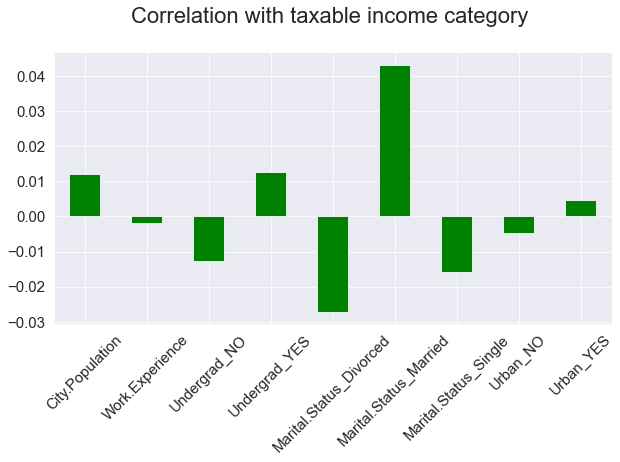

In [113]:
data2 = fraudCheck_data.iloc[:,:-1]

correlations = data2.corrwith(fraudCheck_data.taxable_category)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (10, 5), 
        fontsize = 15, 
        color = 'green',
        rot = 45, grid = True)
plt.title('Correlation with taxable income category \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [114]:
y = fraudCheck_data['taxable_category']
X = fraudCheck_data.drop('taxable_category', axis = 1)



In [117]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

X_ =norm_func(X)
X_.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.33, random_state=42)

In [120]:
print('Shape of x_train: ', X_train.shape)
print('Shape of x_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (402, 9)
Shape of x_test:  (198, 9)
Shape of y_train:  (402,)
Shape of y_test:  (198,)


In [136]:
#base model
score_array = []
for each in range(1,300):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))

In [137]:
for i,j in enumerate(score_array):
    print(i+1,":",j)

1 : 0.6767676767676768
2 : 0.7575757575757576
3 : 0.696969696969697
4 : 0.7575757575757576
5 : 0.7121212121212122
6 : 0.7474747474747475
7 : 0.702020202020202
8 : 0.7373737373737373
9 : 0.696969696969697
10 : 0.7323232323232324
11 : 0.7070707070707071
12 : 0.7474747474747475
13 : 0.7121212121212122
14 : 0.7474747474747475
15 : 0.7323232323232324
16 : 0.7373737373737373
17 : 0.7323232323232324
18 : 0.7474747474747475
19 : 0.7272727272727273
20 : 0.7424242424242424
21 : 0.7373737373737373
22 : 0.7474747474747475
23 : 0.7424242424242424
24 : 0.7474747474747475
25 : 0.7373737373737373
26 : 0.7424242424242424
27 : 0.7373737373737373
28 : 0.7424242424242424
29 : 0.7373737373737373
30 : 0.7373737373737373
31 : 0.7424242424242424
32 : 0.7525252525252525
33 : 0.7373737373737373
34 : 0.7474747474747475
35 : 0.7373737373737373
36 : 0.7575757575757576
37 : 0.7424242424242424
38 : 0.7424242424242424
39 : 0.7373737373737373
40 : 0.7424242424242424
41 : 0.7373737373737373
42 : 0.7424242424242424
43 :

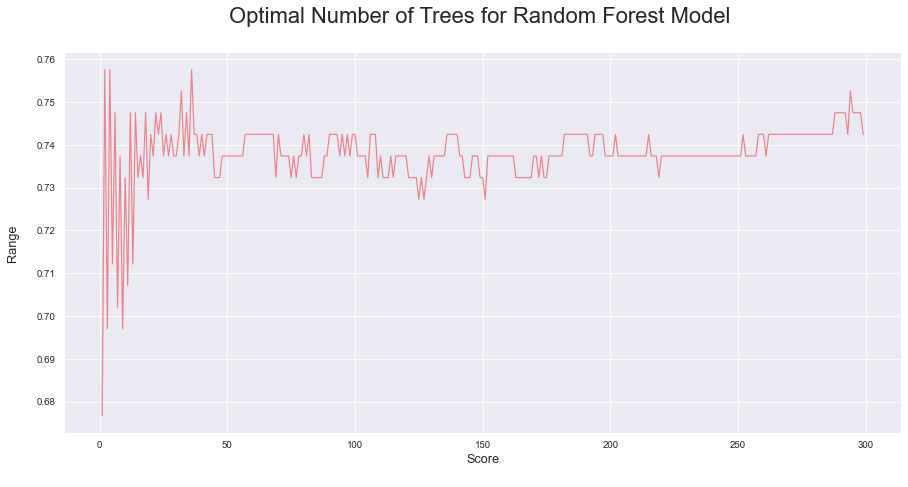

In [139]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,300),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [146]:
num_trees = 35
max_features = 'auto'
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=35)

In [147]:
y_pred = model.predict(X_test)
acc= accuracy_score(y_test,y_pred)
print("The accuracy is  {}".format(acc))

The accuracy is  0.7525252525252525


In [148]:
kfold = KFold(n_splits=10, random_state=42)

results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())


0.7363414634146341


In [162]:
kfold2 = KFold(n_splits=15, random_state=42)


In [159]:
#Random Forest
rf_2 = {"max_depth": [8,6,12,24,26],
           "max_features": [8,10,12],
           "min_samples_split": [3,5],
           "min_samples_leaf": [4,6],
           "bootstrap": [True],
           "n_estimators" :[30,35,40],
           "criterion": ["gini","entropy"],
           "max_leaf_nodes":[6,8,12,26,28],
           "min_impurity_decrease":[0.0],
           "min_weight_fraction_leaf":[0.0]}

tuning_2 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = rf_2, scoring = 'accuracy', n_jobs = 6, cv = kfold)

tuning_2.fit(X_train,np.ravel(y_train))

rf_best_2 = tuning_2.best_estimator_

tuning_2.best_score_

0.7986585365853658

In [160]:
tuning_2.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': 8,
 'max_leaf_nodes': 28,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40}

In [161]:
pred_2 = rf_best_2.predict(X_test)
accuracy_test_2 = accuracy_score(y_test,pred_2)
accuracy_test_2

0.7929292929292929

In [170]:
X_.columns

Index(['City.Population', 'Work.Experience', 'Undergrad_NO', 'Undergrad_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

In [174]:

from sklearn.tree import export_graphviz 
from six import StringIO
import pydotplus
from IPython.display import Image  

colnames = list(X_.columns)
predictors = colnames[0:9]
target = fraud_check.taxable_category
tree1 = rf_best_2.estimators_[20]
dot_data = StringIO()


In [175]:
export_graphviz(tree1,out_file = dot_data, 
                feature_names =predictors, 
                class_names = target, filled =True,
                rounded=True,impurity =False,proportion=False,precision =2)


In [178]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz/bin/'

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  



##Creating pdf file
graph.write_pdf('FraudCheck_RF.pdf')

##Creating png file
graph.write_png('FraudCheck_RF_RF.png')

True

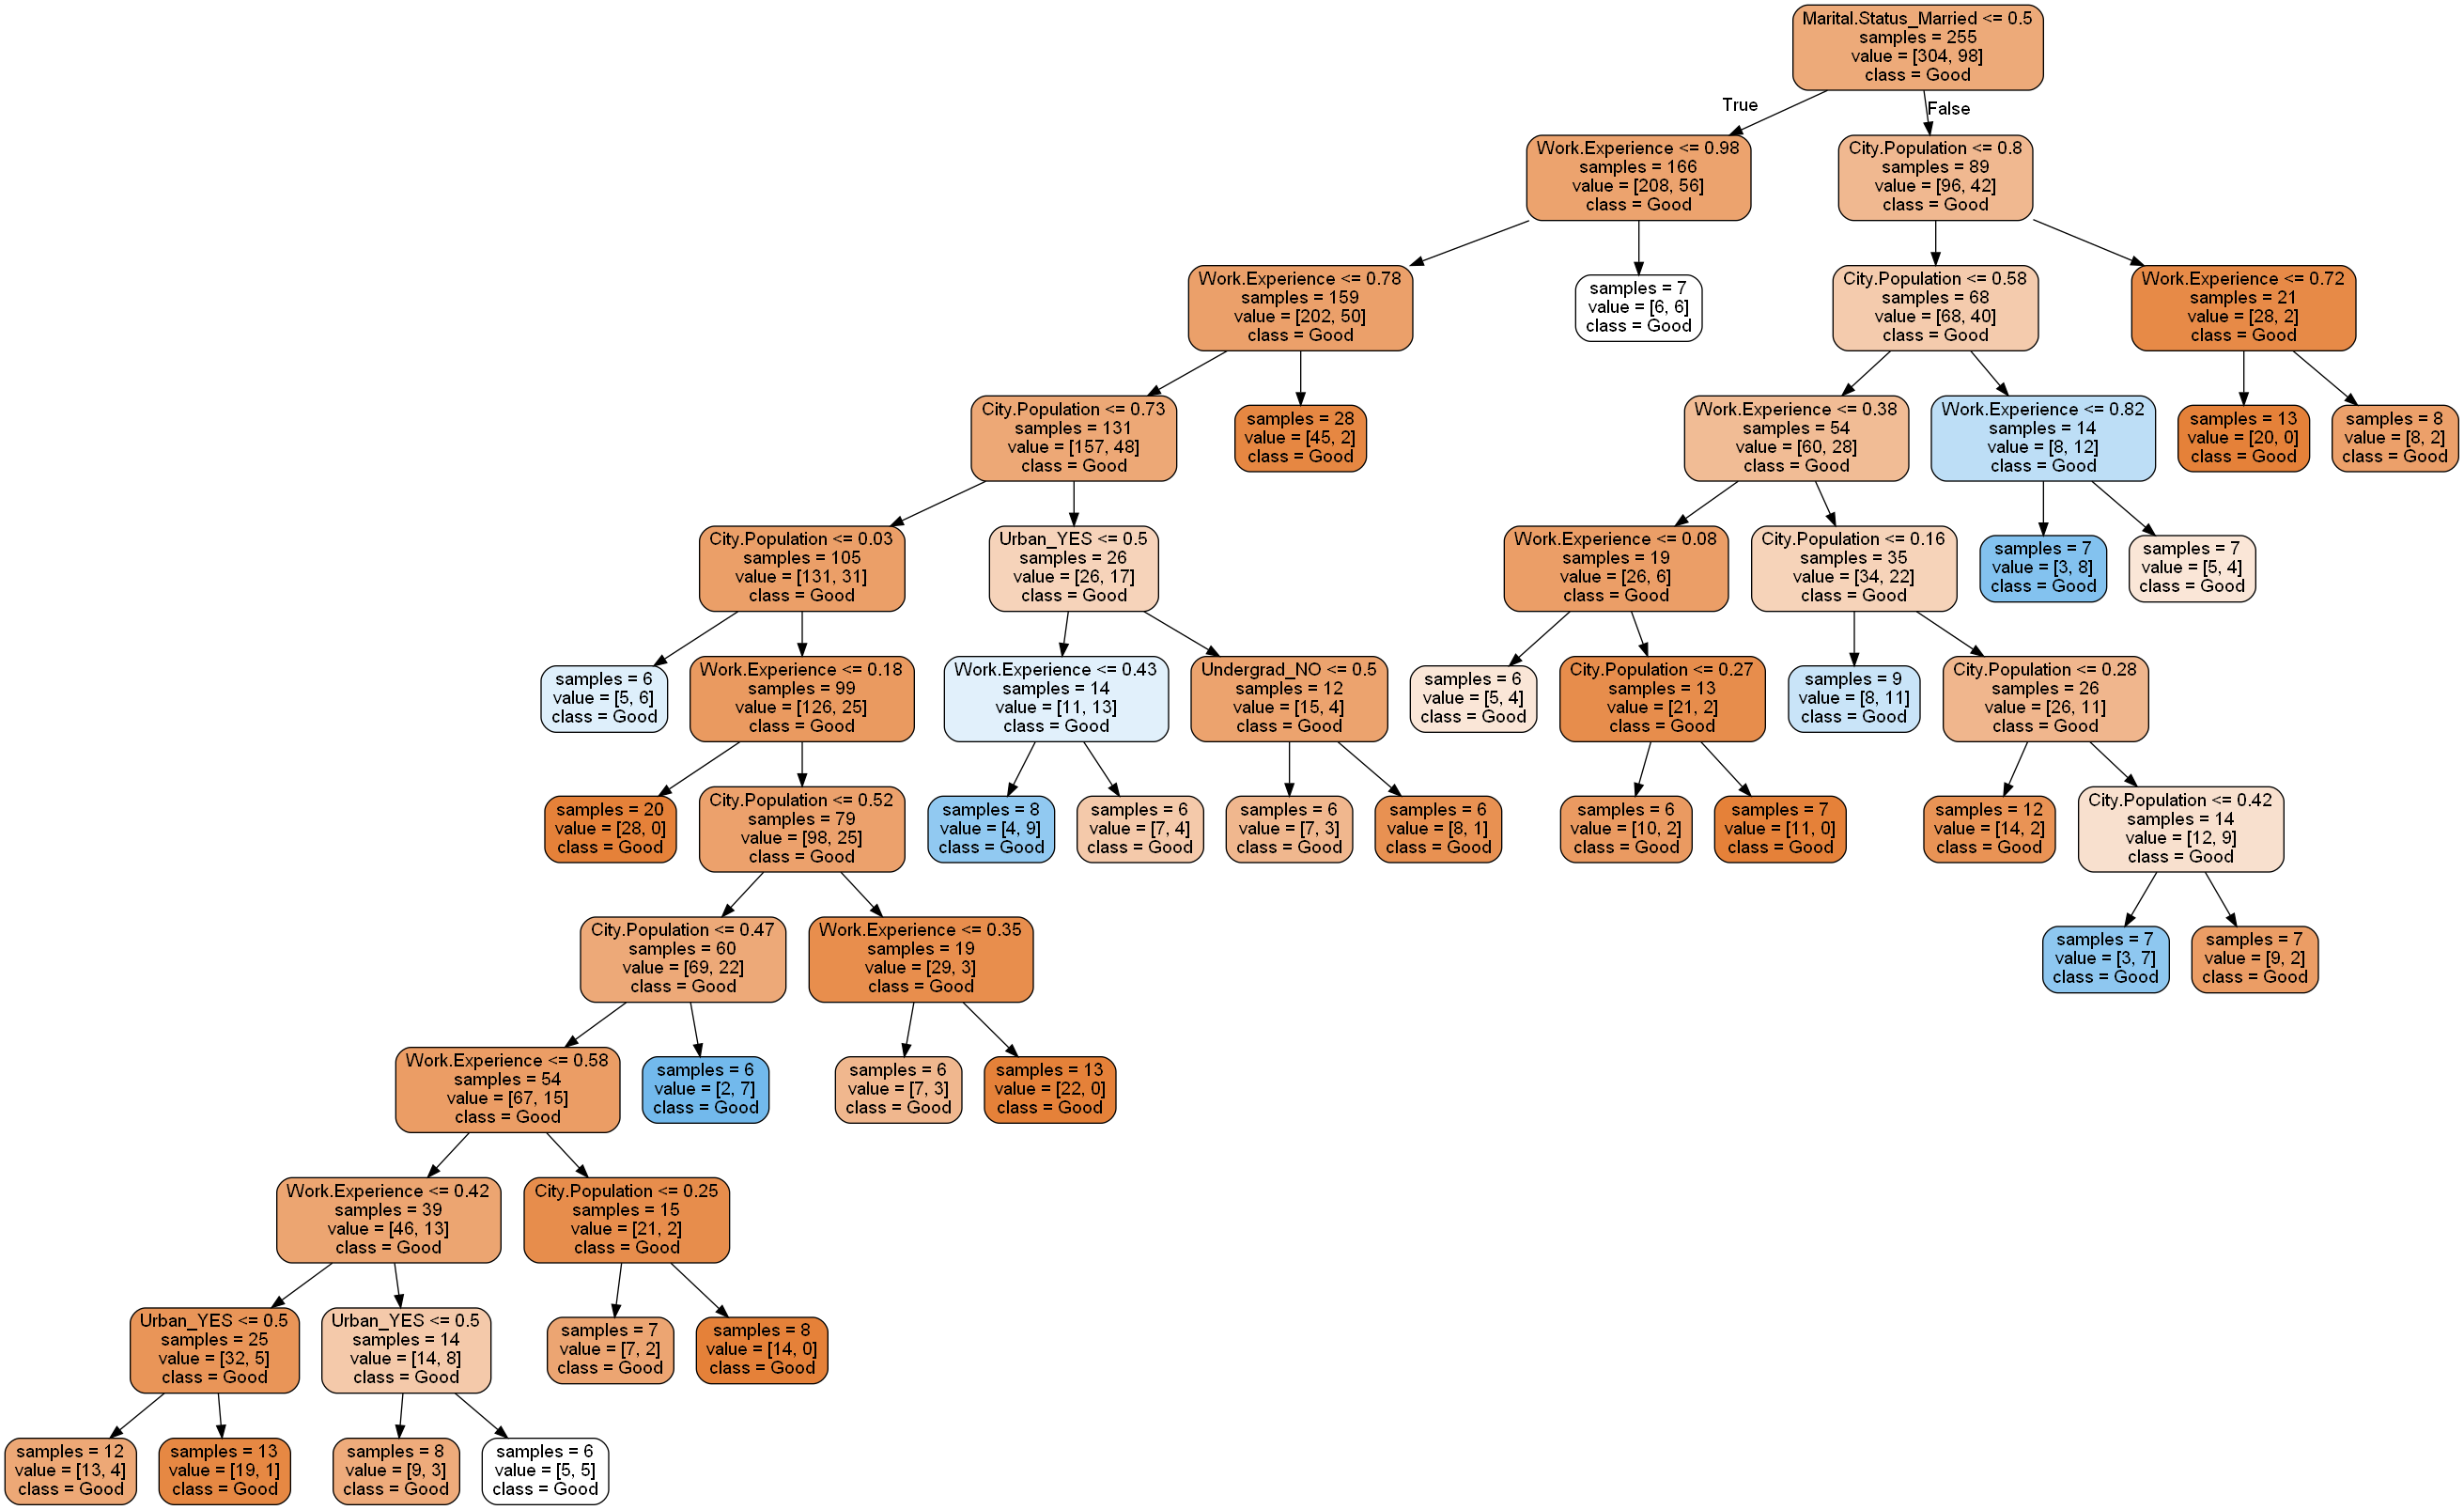

In [179]:
Image(graph.create_png())